In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [3]:
# 슬라이드 15 예제
# 다음 글을 단어로 쪼개서 빈도테이블과 그래프 그리기
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist

text = "Now, I understand that because it's an election season expectations for what we will achieve this year are low But, Mister Speaker, I appreciate the constructive approach that you and other leaders took at the end of last year to pass a budget and make tax cuts permanent for working\
families. So I hope we can work together this year on some bipartisan priorities like criminal justice reform and helping people who are battling prescription drug abuse and heroin abuse. So, who knows, we might surprise the cynics again"
words = word_tokenize(text) #단어로 쪼개기
fdist = FreqDist(words) #빈도 테이블
fdist 

FreqDist({"'s": 1,
          ',': 5,
          '.': 2,
          'But': 1,
          'I': 3,
          'Mister': 1,
          'Now': 1,
          'So': 2,
          'Speaker': 1,
          'a': 1,
          'abuse': 2,
          'achieve': 1,
          'again': 1,
          'an': 1,
          'and': 4,
          'appreciate': 1,
          'approach': 1,
          'are': 2,
          'at': 1,
          'battling': 1,
          'because': 1,
          'bipartisan': 1,
          'budget': 1,
          'can': 1,
          'constructive': 1,
          'criminal': 1,
          'cuts': 1,
          'cynics': 1,
          'drug': 1,
          'election': 1,
          'end': 1,
          'expectations': 1,
          'for': 2,
          'helping': 1,
          'heroin': 1,
          'hope': 1,
          'it': 1,
          'justice': 1,
          'knows': 1,
          'last': 1,
          'leaders': 1,
          'like': 1,
          'low': 1,
          'make': 1,
          'might': 1,
          '

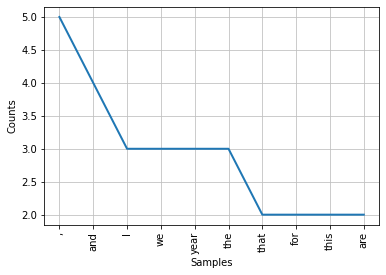

In [4]:
fdist.plot(10) #빈도 그래프
plt.show()

In [5]:
freq_tab = pd.DataFrame({'word':fdist.keys(),
                         'freq':fdist.values()})
freq_tab = freq_tab.sort_values('freq', ascending=False)
freq_tab #빈도 테이블

,word,freq
1,",",5
29,and,4
18,year,3
2,I,3
14,we,3
...,...,...
35,of,1
37,to,1
38,pass,1
39,a,1


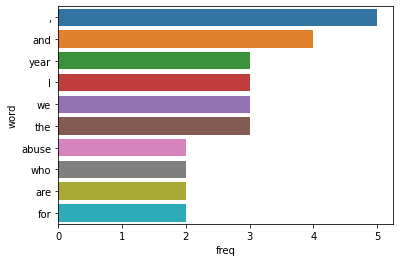

In [6]:
sns.barplot(data=freq_tab[:10], x='freq', y='word') #빈도 그래프
plt.show()

In [7]:
# 전처리 한꺼번에 하기
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()
text="Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard."
def clean_text(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stop_words]
    return text
clean_text(text)

['hello',
 'mr',
 'smith',
 'today',
 'weather',
 'great',
 'citi',
 'awesom',
 'sky',
 'pinkishblu',
 'shouldnt',
 'eat',
 'cardboard']

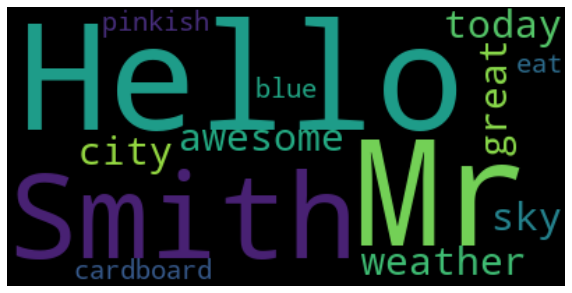

In [8]:
# 기본 워드크라우드
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud().generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear') #Make the displayed image appear more smoothly. 
plt.axis("off")
plt.show()
fig.savefig("wordcloud1.png") #파일로 저장

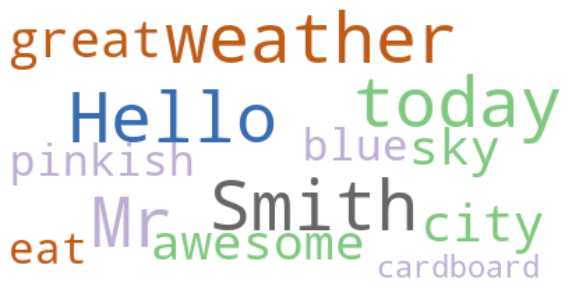

In [9]:
# 워드 크라우드 파라미터 변경
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white",
                      stopwords=STOPWORDS, 
                      colormap='Accent_r').generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear') #Make the displayed image appear more smoothly. 
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud2.png") #파일로 저장

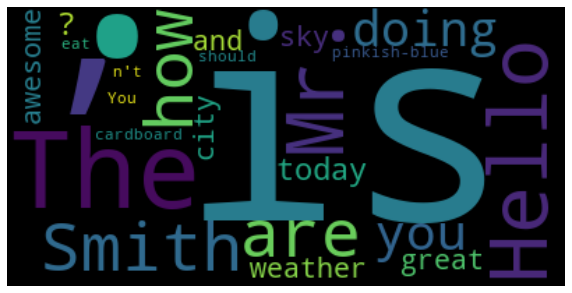

In [10]:
# 빈도테이블로 워드크라우드 그리기
words = word_tokenize(text)
fdist = FreqDist(words)
wordcloud = WordCloud().generate_from_frequencies(fdist) 
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

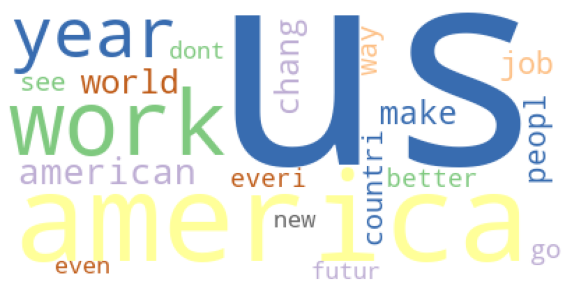

In [11]:
#슬라이드 31번 예제
#링크에 있는 텍스트를 이용해서 불용어처리, 어간추출, 문장부호를 제거한 후 워드클라우드를 그리시오.
import requests
url = 'http://programminghistorian.github.io/ph-submissions/assets/basic-text-processing-in-r/sotu_text/236.txt'
text = requests.get(url).text
words = clean_text(text)
text = ' '.join(words)

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('right') #불용어 집합에 새로운 단어를 더함
STOPWORDS.add('want')
STOPWORDS.add('need')
STOPWORDS.add('give')
STOPWORDS.add('im')

wordcloud = WordCloud(max_font_size=200,
                      max_words=20,
                      background_color='white',
                      stopwords=STOPWORDS,
                      colormap='Accent_r').generate(text) #텍스트를 워드클라우드로!
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
# # 나눔 폰트 설치 (Nanum)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# # 코랩의 런타임을 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [12]:
from matplotlib import font_manager
font_manager.findSystemFonts()

['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regul

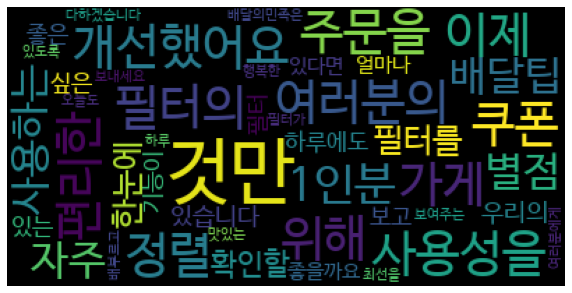

In [13]:
# 한글 워드크라우드
text = "여러분의 더 편리한 주문을 위해 가게 정렬 필터의 사용성을 개선했어요. 이제 쿠폰, 1인분, 배달팁, 별점 등 자주 사용하는 필터를 한눈에 확인할 수 있습니다. 우리의 하루에도 좋은 것만, 보고 싶은 것만 볼 수 있는 필터 기능이 있다면 얼마나 좋을까요? 배달의민족은 여러분에게 맛있는 것만 보여주는 필터가 될 수 있도록 최선을 다하겠습니다. 오늘도 배부르고 행복한 하루 보내세요!"
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
# !pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 11.5 MB/s 
     |████████████████████████████████| 453 kB 45.9 MB/s 


In [18]:
from konlpy.tag import Okt
text = '호수를 둘러싼 자전거 길을 따라 느긋하게 춘천을 둘러보는 여행도 추천한다.'
okt = Okt()
print(okt.morphs(text)) #형태소추출

['호수', '를', '둘러싼', '자전거', '길', '을', '따라', '느긋하게', '춘천', '을', '둘러보는', '여행', '도', '추천', '한다', '.']


In [19]:
print(okt.pos(text)) #품사태깅

[('호수', 'Noun'), ('를', 'Josa'), ('둘러싼', 'Verb'), ('자전거', 'Noun'), ('길', 'Noun'), ('을', 'Josa'), ('따라', 'Verb'), ('느긋하게', 'Adjective'), ('춘천', 'Noun'), ('을', 'Josa'), ('둘러보는', 'Verb'), ('여행', 'Noun'), ('도', 'Josa'), ('추천', 'Noun'), ('한다', 'Verb'), ('.', 'Punctuation')]


In [20]:
words = okt.nouns(text) #명사추출
print(words)

['호수', '자전거', '길', '춘천', '여행', '추천']


In [21]:
fdist = FreqDist(words) #빈도 테이블
fdist
freq_tab = pd.DataFrame({'word': fdist.keys(),
                         'freq': fdist.values()})
freq_tab = freq_tab.sort_values('freq', ascending=False)
freq_tab

,word,freq
0,호수,1
1,자전거,1
2,길,1
3,춘천,1
4,여행,1
5,추천,1


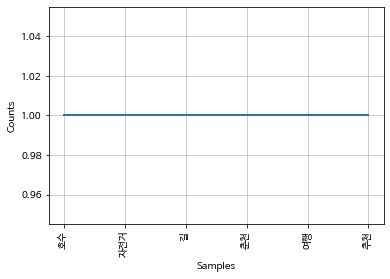

In [22]:
plt.rc('font', family='NanumBarunGothic') 
fdist.plot()
plt.show()

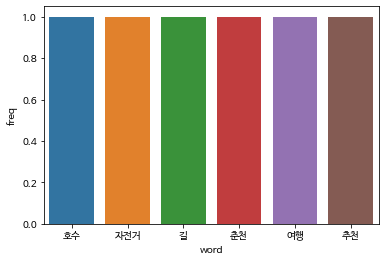

In [23]:
sns.barplot(x='word', y='freq', data=freq_tab)
plt.show()

# nltk.Text() 기능들

In [25]:
text = "여러분의 더 편리한 주문을 위해 가게 정렬 필터의 사용성을 개선했어요. 이제 쿠폰, 1인분, 배달팁, 별점 등 자주 사용하는 필터를 한눈에 확인할 수 있습니다. 우리의 하루에도 좋은 것만, 보고 싶은 것만 볼 수 있는 필터 기능이 있다면 얼마나 좋을까요? 배달의민족은 여러분에게 맛있는 것만 보여주는 필터가 될 수 있도록 최선을 다하겠습니다. 오늘도 배부르고 행복한 하루 보내세요!"
okt = Okt()
words = okt.nouns(text)
text = nltk.Text(words)

In [26]:
text.vocab() #빈도

FreqDist({'가게': 1,
          '개선': 1,
          '것': 3,
          '기능': 1,
          '더': 1,
          '등': 1,
          '민족': 1,
          '배달': 2,
          '보고': 1,
          '볼': 1,
          '사용': 1,
          '사용성': 1,
          '수': 3,
          '얼마나': 1,
          '여러분': 2,
          '오늘': 1,
          '우리': 1,
          '위해': 1,
          '이제': 1,
          '인분': 1,
          '자주': 1,
          '점': 1,
          '정렬': 1,
          '주문': 1,
          '최선': 1,
          '쿠폰': 1,
          '팁': 1,
          '필터': 4,
          '하루': 2,
          '한눈': 1,
          '확인': 1})

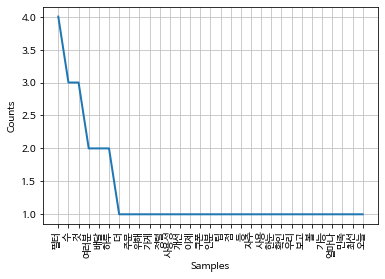

In [27]:
text.plot() #빈도 그래프
plt.show()

In [28]:
text.tokens #단어로 잘라줌

['여러분',
 '더',
 '주문',
 '위해',
 '가게',
 '정렬',
 '필터',
 '사용성',
 '개선',
 '이제',
 '쿠폰',
 '인분',
 '배달',
 '팁',
 '점',
 '등',
 '자주',
 '사용',
 '필터',
 '한눈',
 '확인',
 '수',
 '우리',
 '하루',
 '것',
 '보고',
 '것',
 '볼',
 '수',
 '필터',
 '기능',
 '얼마나',
 '배달',
 '민족',
 '여러분',
 '것',
 '필터',
 '수',
 '최선',
 '오늘',
 '하루']

In [29]:
text.count('배달')

2

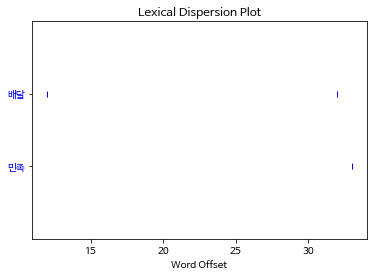

In [30]:
text.dispersion_plot(['배달', '민족'])

In [31]:
text.concordance('배달') #단어가 어디에서 매치되는지

Displaying 2 of 2 matches:
여러분 더 주문 위해 가게 정렬 필터 사용성 개선 이제 쿠폰 인분 배달 팁 점 등 자주 사용 필터 한눈 확인 수 우리 하루 것 보고 것 볼
필터 한눈 확인 수 우리 하루 것 보고 것 볼 수 필터 기능 얼마나 배달 민족 여러분 것 필터 수 최선 오늘 하루


In [32]:
text.similar('배달') #단어와 유사한 단어가 있는지

In [34]:
text.collocations() #같이 나오는 단어들